<a href="https://colab.research.google.com/github/akib26/TwitterSentimentAnalysis/blob/v2/TWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Positive words


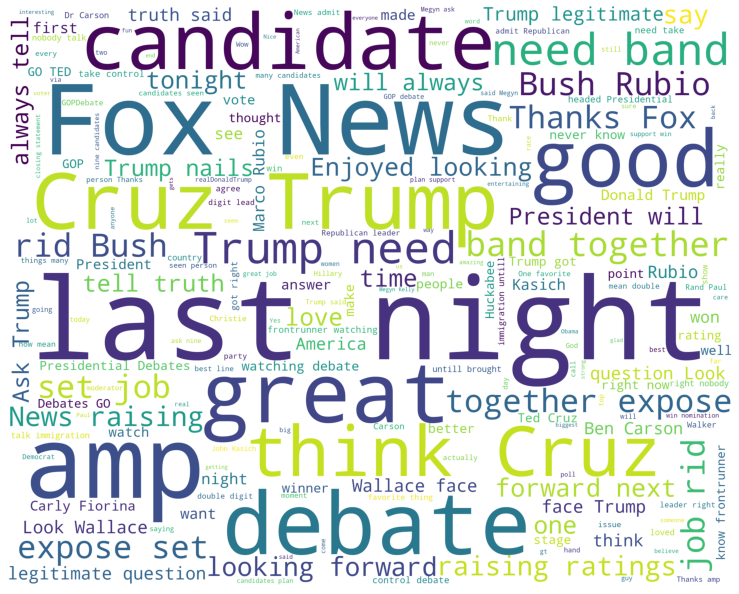

Negative words


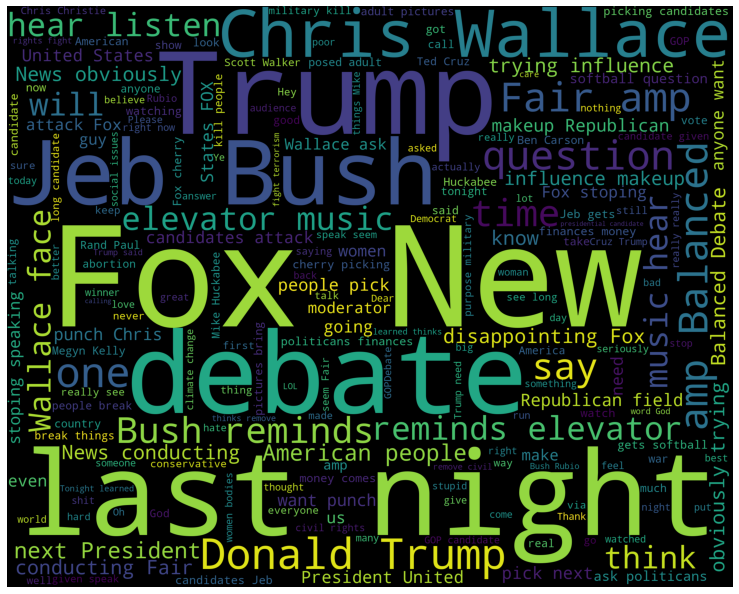

Neutral words


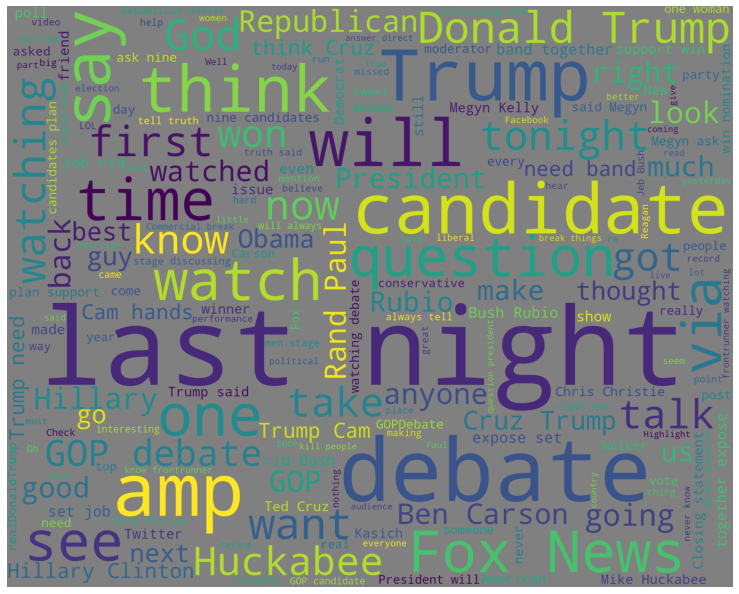

7997     RT @kimguilfoyle: Two great debates! Who were ...
9375     RT @DonnieWahlberg: Enjoyed the #GOPDebates an...
8899     RT @RWSurferGirl: Trump has got it right, nobo...
538                                 Trumptastic #GOPDebate
1077     Wouldn't this be refreshing?\n@tedcruz @RealBe...
                               ...                        
9252                   @DrBradHolland #GOPDebates spot on!
13600    RT @RWSurferGirl: I think Cruz and Trump need ...
13397    RT @RWSurferGirl: I think Cruz and Trump need ...
13729    RT @RWSurferGirl: I think Cruz and Trump need ...
12838    RT @RWSurferGirl: Thanks Fox News, you're rais...
Name: text, Length: 231, dtype: object
3273     RT @fakedansavage: American Women: Given a cho...
3450     Treating women like human beings isn't politic...
1378     Trump shows his true colors at the GOP debate ...
37       RT @kvxrdashian: Jeb Bush: "Obama is at fault,...
11131    RT @ThatChrisGore: Ted Cruz's mutant superpowe...
                 

"\nneg_cnt = 0\npos_cnt = 0\nneu_cnt=0\nfor obj in test_neu: \n    res =  classifier.classify(extract_features(obj.split()))\n    if(res == 'Neutral'): \n        neu_cnt = neu_cnt + 1\nfor obj in test_neg: \n    res =  classifier.classify(extract_features(obj.split()))\n    if(res == 'Negative'): \n        neg_cnt = neg_cnt + 1\nfor obj in test_pos: \n    res =  classifier.classify(extract_features(obj.split()))\n    if(res == 'Positive'): \n        pos_cnt = pos_cnt + 1\n        \nprint('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        \nprint('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))\nprint('[Neutral]: %s/%s '  % (len(test_neu),neu_cnt))\n"

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]
# Splitting the dataset into train and test set
#X=data['text']
#y=data['sentiment']




#X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=1,stratify=y)
train,test=train_test_split(data,test_size=0.1)
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']
train_neu = train[ train['sentiment'] == 'Neutral']
train_neu = train_neu['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_neu,'grey')
tweets = []
stopwords_set = set(stopwords.words("english"))
 
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))
 
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
print(test_pos)
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']
print(test_neg)
test_neu = test[ test['sentiment'] == 'Neutral']
test_neu = test_neu['text']
print(test_neu)


# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
 
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))
 
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

'''
neg_cnt = 0
pos_cnt = 0
neu_cnt=0
for obj in test_neu: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Neutral'): 
        neu_cnt = neu_cnt + 1
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))
print('[Neutral]: %s/%s '  % (len(test_neu),neu_cnt))
'''

In [27]:
test.shape

(1388, 2)

In [28]:
test.columns

Index(['text', 'sentiment'], dtype='object')

In [29]:
print(test.head())

                                                   text sentiment
3273  RT @fakedansavage: American Women: Given a cho...  Negative
7706  RT @10NewsAtkinson: Millennials reaction to to...   Neutral
7997  RT @kimguilfoyle: Two great debates! Who were ...  Positive
9375  RT @DonnieWahlberg: Enjoyed the #GOPDebates an...  Positive
3450  Treating women like human beings isn't politic...  Negative


In [30]:
print(train.head())

                                                    text sentiment
10309  On the low though the GOP wouldn't be a factor...  Negative
12953  RT @AnnemarieWeers: @PoetinPoeville Did you kn...   Neutral
887    #GOPdebate: Trump trumps Trump. @realDonaldTru...  Negative
2654   Even the @POTUS came out for the #GOPDebate ht...   Neutral
12777  Ben Carson asked to comment on Lenny Kravitz w...   Neutral


In [31]:
predicted=[]
for obj in test['text']:
  res=classifier.classify(extract_features(obj.split()))
  predicted.append(res)

In [32]:
testset=test['sentiment'].tolist()

In [33]:
from nltk.metrics import ConfusionMatrix
print(ConfusionMatrix(testset, predicted).pretty_format(sort_by_count=True))

         |   N       P |
         |   e   N   o |
         |   g   e   s |
         |   a   u   i |
         |   t   t   t |
         |   i   r   i |
         |   v   a   v |
         |   e   l   e |
---------+-------------+
Negative |<748> 79  25 |
 Neutral | 205 <89> 11 |
Positive | 118  37 <76>|
---------+-------------+
(row = reference; col = test)



The numbers embedded in <> are the true positives (tp)meaning correctly classified.


*   rows refer to actual test set sentiment
*   columns refer to predicted sentiment by our naive bayes classifier





In [ ]:
import pickle
mymodel = 'naive_finalized_model.sav'
pickle.dump(classifier, open(mymodel, 'wb'))

# Facebook

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


fb = pd.read_csv('fb_sentiment.csv')
fb = fb[['text','sentiment']]
print(fb.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                text sentiment
0  Drug Runners and  a U.S. Senator have somethin...   Neutral
1  Heres a single, to add, to Kindle. Just read t...   Neutral
2  If you tire of Non-Fiction.. Check out http://...   Neutral
3    Ghost of Round Island is supposedly nonfiction.   Neutral
4  Why is Barnes and Nobles version of the Kindle...  Negative


In [16]:
fbtrain, fbtest = train_test_split(fb,test_size = 0.2)

In [17]:
stopwords_set = set(stopwords.words("english"))
posts=[]
for index, row in fbtrain.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    posts.append((words_without_stopwords, row.sentiment))
 

In [18]:
def get_words_in_posts(posts):
    all = []
    for (words, sentiment) in posts:
        all.extend(words)
    return all
 
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_posts(posts))
 
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


# Training the Naive Bayes classifier
fbtraining_set = nltk.classify.apply_features(extract_features,posts)
fbclassifier = nltk.NaiveBayesClassifier.train(fbtraining_set)

In [35]:
fbpredicted=[]
for obj in fb['text']:
  res=fbclassifier.classify(extract_features(obj.split()))
  fbpredicted.append(res)

In [36]:
fbactual=fb['sentiment'].tolist()

In [37]:
from nltk.metrics import ConfusionMatrix
print(ConfusionMatrix(fbactual, fbpredicted).pretty_format(sort_by_count=True))

         |   P       N |
         |   o   N   e |
         |   s   e   g |
         |   i   u   a |
         |   t   t   t |
         |   i   r   i |
         |   v   a   v |
         |   e   l   e |
---------+-------------+
Positive |<613> 20   8 |
 Neutral | 120<159>  1 |
Negative |  22  36 <21>|
---------+-------------+
(row = reference; col = test)



In [22]:
fb.shape

(1000, 2)

In [38]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [24]:
fbtrain_pos = fbtrain[ fbtrain['sentiment'] == 'Positive']
fbtrain_pos = fbtrain_pos['text']
fbtrain_neg = fbtrain[ fbtrain['sentiment'] == 'Negative']
fbtrain_neg = fbtrain_neg['text']
fbtrain_neu = fbtrain[ fbtrain['sentiment'] == 'Neutral']
fbtrain_neu = fbtrain_neu['text']

Positive words


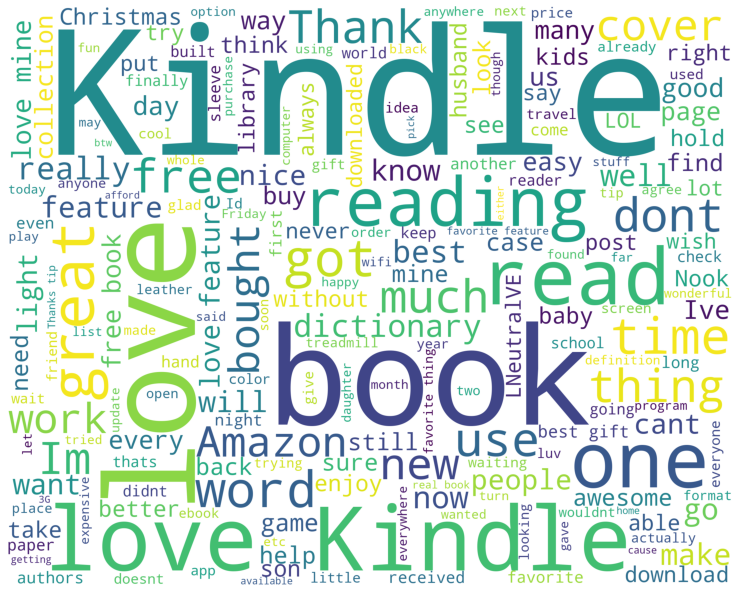

Negative words


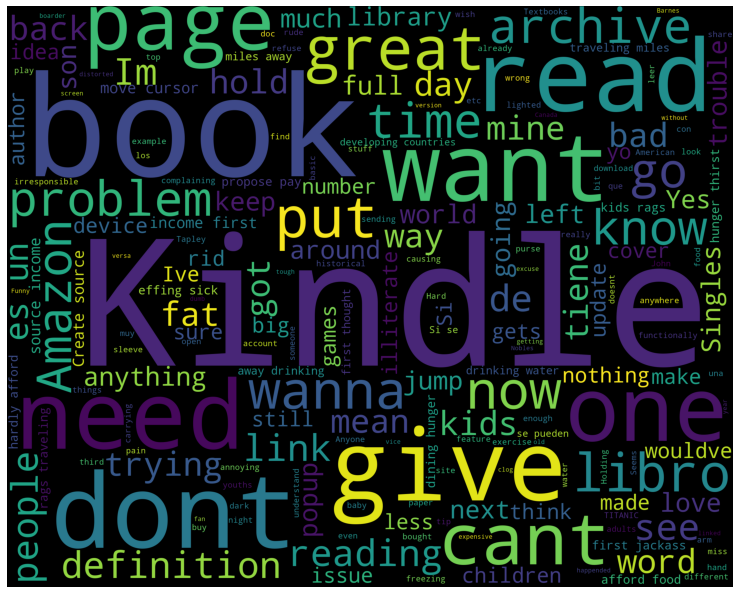

Neutral words


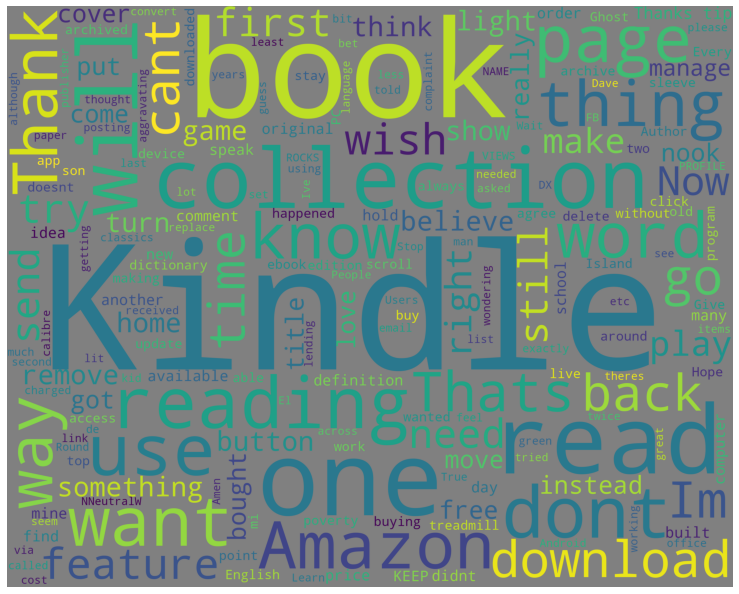

In [25]:
print("Positive words")
wordcloud_draw(fbtrain_pos,'white')
print("Negative words")
wordcloud_draw(fbtrain_neg)
print("Neutral words")
wordcloud_draw(fbtrain_neu,'grey')
